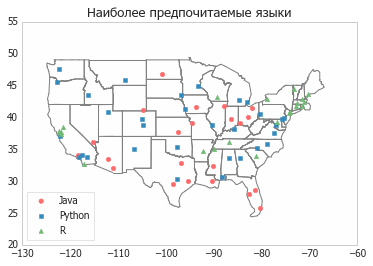

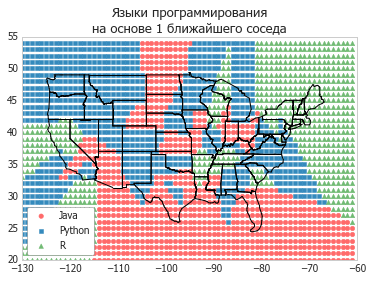

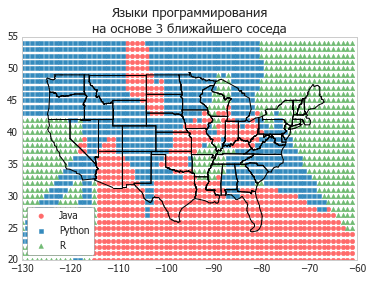

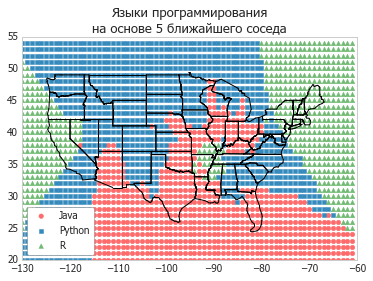

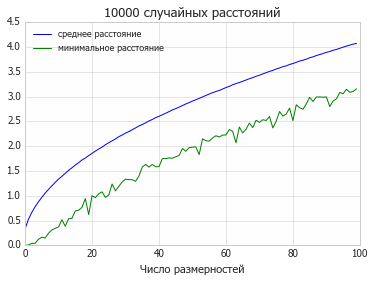

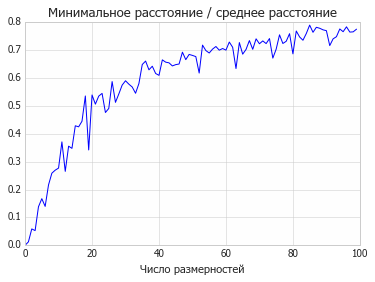

In [14]:
# -*- coding: utf-8 -*-
"""
Глава 12, рис. 1_6
"""

import sys
sys.path.append("../../code-python3-ru")

from lib.linear_algebra import squared_distance, distance, sum_of_squares
from lib.statistics import mean

from collections import Counter
import math, random
import re

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline  

mpl.style.use('ggplot')  
mpl.style.use('seaborn-whitegrid')  
mpl.rcParams['axes.facecolor'] = u'fefefe'
#mpl.rcParams.update({'font.family': 'Ubuntu Condensed'})   
mpl.rcParams.update({'font.family': 'Tahoma'})

   
segments = []
points = []

lat_long_regex = r"<point lat=\"(.*)\" lng=\"(.*)\""

with open("../../code-python3-ru/data/states.txt", "r") as f:
    lines = [line for line in f]

for line in lines:
    if line.startswith("</state>"):
        for p1, p2 in zip(points, points[1:]):
            segments.append((p1, p2))
        points = []
    s = re.search(lat_long_regex, line)
    if s:
        lat, lon = s.groups()
        points.append((float(lon), float(lat)))



def raw_majority_vote(labels):
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    return winner

def majority_vote(labels):
    """подразумевает, что метки упорядочены от ближайшей до самой удаленной"""
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count
                       for count in vote_counts.values()
                       if count == winner_count])

    if num_winners == 1:
        return winner                     # unique winner, so return it
    else:
        return majority_vote(labels[:-1]) # try again without the farthest


def knn_classify(k, labeled_points, new_point):
    """каждая маркированная точка должна быть представлена парой (точка, метка)"""

    # упорядочить маркированные точки от ближайшей до самой удаленной
    by_distance = sorted(labeled_points,
                         key=lambda point_label: distance(point_label[0], new_point))

    # найти метки для k ближайших
    k_nearest_labels = [label for _, label in by_distance[:k]]

    # и дать им проголосовать
    return majority_vote(k_nearest_labels)


cities = [
    (-86.75,33.5666666666667,'Python'),            (-88.25,30.6833333333333,'Python'),
    (-112.016666666667,33.4333333333333,'Java'),   (-110.933333333333,32.1166666666667,'Java'),
    (-92.2333333333333,34.7333333333333,'R'),      (-121.95,37.7,'R'),(-118.15,33.8166666666667,'Python'),
    (-118.233333333333,34.05,'Java'),              (-122.316666666667,37.8166666666667,'R'),
    (-117.6,34.05,'Python'),                       (-116.533333333333,33.8166666666667,'Python'),
    (-121.5,38.5166666666667,'R'),                 (-117.166666666667,32.7333333333333,'R'),
    (-122.383333333333,37.6166666666667,'R'),      (-121.933333333333,37.3666666666667,'R'),
    (-122.016666666667,36.9833333333333,'Python'), (-104.716666666667,38.8166666666667,'Python'),
    (-104.866666666667,39.75,'Python'),            (-72.65,41.7333333333333,'R'),
    (-75.6,39.6666666666667,'Python'),             (-77.0333333333333,38.85,'Python'),
    (-80.2666666666667,25.8,'Java'),               (-81.3833333333333,28.55,'Java'),
    (-82.5333333333333,27.9666666666667,'Java'),   (-84.4333333333333,33.65,'Python'),
    (-116.216666666667,43.5666666666667,'Python'), (-87.75,41.7833333333333,'Java'),
    (-86.2833333333333,39.7333333333333,'Java'),   (-93.65,41.5333333333333,'Java'),
    (-97.4166666666667,37.65,'Java'),              (-85.7333333333333,38.1833333333333,'Python'),
    (-90.25,29.9833333333333,'Java'),              (-70.3166666666667,43.65,'R'),
    (-76.6666666666667,39.1833333333333,'R'),      (-71.0333333333333,42.3666666666667,'R'),
    (-72.5333333333333,42.2,'R'),                  (-83.0166666666667,42.4166666666667,'Python'),
    (-84.6,42.7833333333333,'Python'),             (-93.2166666666667,44.8833333333333,'Python'),
    (-90.0833333333333,32.3166666666667,'Java'),   (-94.5833333333333,39.1166666666667,'Java'),
    (-90.3833333333333,38.75,'Python'),            (-108.533333333333,45.8,'Python'),
    (-95.9,41.3,'Python'),                         (-115.166666666667,36.0833333333333,'Java'),
    (-71.4333333333333,42.9333333333333,'R'),      (-74.1666666666667,40.7,'R'),
    (-106.616666666667,35.05,'Python'),            (-78.7333333333333,42.9333333333333,'R'),
    (-73.9666666666667,40.7833333333333,'R'),      (-80.9333333333333,35.2166666666667,'Python'),
    (-78.7833333333333,35.8666666666667,'Python'), (-100.75,46.7666666666667,'Java'),
    (-84.5166666666667,39.15,'Java'),              (-81.85,41.4,'Java'),
    (-82.8833333333333,40,'Java'),                 (-97.6,35.4,'Python'),
    (-122.666666666667,45.5333333333333,'Python'), (-75.25,39.8833333333333,'Python'),
    (-80.2166666666667,40.5,'Python'),             (-71.4333333333333,41.7333333333333,'R'),
    (-81.1166666666667,33.95,'R'),                 (-96.7333333333333,43.5666666666667,'Python'),
    (-90,35.05,'R'),                               (-86.6833333333333,36.1166666666667,'R'),
    (-97.7,30.3,'Python'),                         (-96.85,32.85,'Java'),
    (-95.35,29.9666666666667,'Java'),              (-98.4666666666667,29.5333333333333,'Java'),
    (-111.966666666667,40.7666666666667,'Python'), (-73.15,44.4666666666667,'R'),
    (-77.3333333333333,37.5,'Python'),             (-122.3,47.5333333333333,'Python'),
    (-89.3333333333333,43.1333333333333,'R'),      (-104.816666666667,41.15,'Java')
]

cities = [([longitude, latitude], language) for longitude, latitude, language in cities]

def plot_state_borders(plt, color='0.5'):
    for (lon1, lat1), (lon2, lat2) in segments:
        plt.plot([lon1, lon2], [lat1, lat2], color=color)


def plot_cities():
    fig = plt.figure()
    
    # ключ - это язык, значение - это пара (долгота, широта)
    plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }

    # каждый язык должен иметь разную метку и цвет
    markers = { "Java" : "o", "Python" : "s", "R" : "^" }
    
    # вместо кодов можно указать "r", "b" и "g"
    colors  = { "Java" : "#FF6A6A", "Python" : "#348ABD", "R" : "#70BA73" } 

    for (longitude, latitude), language in cities:
        plots[language][0].append(longitude)
        plots[language][1].append(latitude)

    # создать серии разброса для каждого языка
    for language, (x, y) in plots.items():
        plt.scatter(x, y, color=colors[language], 
                          marker=markers[language], 
                          label=language, zorder=10)

    plot_state_borders(plt)           # отрисовать границы штатов

    plt.grid(False)
    plt.legend(frameon=True,loc=0,fontsize=10) # matplotlib сама выберет расположение легенды
    plt.axis([-130,-60,20,55])        # установить оси
    plt.title("Наиболее предпочитаемые языки", fontsize=13)
    plt.show()
    #fig.savefig("fig_12-1", dpi=300, bbox_inches='tight', facecolor='w') 


def classify_and_plot_grid(k=1):
    fig = plt.figure()
    
    plots   = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }
    markers = { "Java" : "o", "Python" : "s", "R" : "^" }
    colors  = { "Java" : "#FF6A6A", "Python" : "#348ABD", "R" : "#70BA73" }

    for longitude in range(-130, -60):
        for latitude in range(20, 55):
            predicted_language = knn_classify(k, cities, [longitude, latitude])
            plots[predicted_language][0].append(longitude)
            plots[predicted_language][1].append(latitude)

    for language, (x, y) in plots.items():
        plt.scatter(x, y, color=colors[language], marker=markers[language],
                          label=language, zorder=0)

    plot_state_borders(plt, color='black') 

    plt.grid(False)
    legend = plt.legend(frameon=True, loc=0, fancybox=True, fontsize=10)
    frame = legend.get_frame()
    frame.set_facecolor('white')
    frame.set_edgecolor('grey')
    
    plt.axis([-130,-60,20,55]) 
    plt.title("Языки программирования\nна основе " + str(k) + " ближайшего соседа", fontsize=13)
    plt.show()
    if k==1:   i=2
    elif k==3: i=3
    else:      i=4    
    #fig.savefig("fig_12-" + str(i), dpi=300, bbox_inches='tight', facecolor='w') 

#
# проблема проклятия размерности
#

def random_point(dim):
    return [random.random() for _ in range(dim)]

def random_distances(dim, num_pairs):
    return [distance(random_point(dim), random_point(dim))
            for _ in range(num_pairs)]

def curse():
    fig = plt.figure()
    
    dimensions = range(1, 101)

    avg_distances = []
    min_distances = []

    random.seed(0)
    for dim in dimensions:
        distances = random_distances(dim, 10000)  # 10000 произвольных пар
        avg_distances.append(mean(distances))     # отследить средние
        min_distances.append(min(distances))      # отследить минимальные
  
    plt.plot(avg_distances, 'b-',label='среднее расстояние')
    plt.plot(min_distances, 'g-',label='минимальное расстояние')
    plt.legend(loc=0, fontsize=9)          
    plt.axis([0,100,0,4.5])                
    plt.xlabel("Число размерностей", fontsize=11)
    plt.title("10000 случайных расстояний", fontsize=13)
    plt.show()
    #fig.savefig("fig_12-5", dpi=300, bbox_inches='tight', facecolor='w') 
    

def curse_coeff():
    fig = plt.figure()
    
    dimensions = range(1, 101)

    avg_distances = []
    min_distances = []

    random.seed(0)
    for dim in dimensions:
        distances = random_distances(dim, 10000)  
        avg_distances.append(mean(distances))     
        min_distances.append(min(distances))      
        
    min_avg_ratio = [min_dist / avg_dist
                     for min_dist, avg_dist in zip(min_distances, avg_distances)]

    plt.plot(min_avg_ratio, 'b-')
    plt.axis([0,100,0.0,0.8]) 
    plt.xlabel("Число размерностей", fontsize=11)
    plt.title("Минимальное расстояние / среднее расстояние", fontsize=13)
    plt.show()
    #fig.savefig("fig_12-6", dpi=300, bbox_inches='tight', facecolor='w') 
    

plot_cities()                  # 1
classify_and_plot_grid(1)      # 2
classify_and_plot_grid(3)      # 3
classify_and_plot_grid(5)      # 4
curse()                        # 6
curse_coeff()                  # 7